여러개 파일을 읽어봅시다

꽃에 대한 이미지 파일입니다 .

https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [1]:
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)

228827136/228813984 [==============================] - 4s 0us/step


In [2]:
data_dir

'/root/.keras/datasets/flower_photos'

In [3]:
!ls '/root/.keras/datasets/flower_photos'

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [4]:
!ls /root/.keras/datasets/flower_photos/roses

10090824183_d02c613f10_m.jpg  3494252600_29f26e3ff0_n.jpg
102501987_3cdb8e5394_n.jpg    3500121696_5b6a69effb_n.jpg
10503217854_e66a804309.jpg    3526860692_4c551191b1_m.jpg
10894627425_ec76bbc757_n.jpg  353897245_5453f35a8e.jpg
110472418_87b6a3aa98_m.jpg    3550491463_3eb092054c_m.jpg
11102341464_508d558dfc_n.jpg  3554620445_082dd0bec4_n.jpg
11233672494_d8bf0a3dbf_n.jpg  3556123230_936bf084a5_n.jpg
11694025703_9a906fedc1_n.jpg  3560426426_1c66cb8330.jpg
118974357_0faa23cce9_n.jpg    3576488381_611f3446e0_n.jpg
11944957684_2cc806276e.jpg    3621011057_0d03bd171b_n.jpg
12045735155_42547ce4e9_n.jpg  3624546109_8eb98f0cdb.jpg
12165480946_c4a3fe182d_n.jpg  3630246240_4fee9a33db.jpg
12202373204_34fb07205b.jpg    3634244527_e72c47842c_n.jpg
12238827553_cf427bfd51_n.jpg  3654988152_b11178bbcb.jpg
12240165555_98625b1e88_n.jpg  3655527028_0fab2b547d_n.jpg
12240303_80d87f77a3_n.jpg     3661675690_ed2d05fa5f_n.jpg
12240577184_b0de0e53ea_n.jpg  3663244576_97f595cf4a.jpg
12243068283_ee4c2683e2_n.jp

glob 라이브러리를 통해 폴더의 파일명을 리스트로 가져올 수 있습니다

In [5]:
import glob
roses = list(glob.glob(data_dir+'/roses/*.*')) #폴더 내의 파일(경로포함) 가져오기

In [6]:
roses

['/root/.keras/datasets/flower_photos/roses/12450781274_eb78723921.jpg',
 '/root/.keras/datasets/flower_photos/roses/21347496068_f4d3339607.jpg',
 '/root/.keras/datasets/flower_photos/roses/15750320284_22ef21c682.jpg',
 '/root/.keras/datasets/flower_photos/roses/16334786972_1b3e71cab8_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/15424480096_45bb574b33.jpg',
 '/root/.keras/datasets/flower_photos/roses/17077876795_6dd1b03f54_m.jpg',
 '/root/.keras/datasets/flower_photos/roses/2183357362_4b4da4b6b5.jpg',
 '/root/.keras/datasets/flower_photos/roses/5061135742_2870a7b691_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/14001990976_bd2da42dbc.jpg',
 '/root/.keras/datasets/flower_photos/roses/1775233884_12ff5a124f.jpg',
 '/root/.keras/datasets/flower_photos/roses/4065283966_9504b98269.jpg',
 '/root/.keras/datasets/flower_photos/roses/3655527028_0fab2b547d_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/5231103167_a03280e9f6_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/562

In [7]:
type(roses)

list

In [13]:
import cv2

width = 180
height = 180

imgs = []
for i in roses:
  img = cv2.imread(i) 
  img = cv2.resize(img, dsize=(width, height))   # 사진 사이즈 동일하게 변환
  imgs.append(img)

In [14]:
import numpy as np
imgs = np.array(imgs)   # 동일한 사이즈여야 numpy로 제대로 변환됨
imgs.shape


(641, 180, 180, 3)

In [15]:
img.shape

(180, 180, 3)

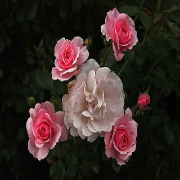

In [16]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

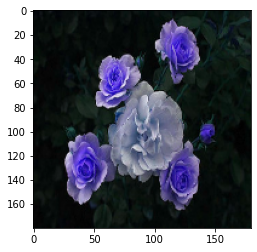

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img_height = 180
img_width = 180

텐서플로우에서는 이미지 폴더를 손쉽게 읽어들일 수 있는 함수를 제공합니다. 

이 경우 폴더명이 라벨명이 됩니다

shuffle 등 필요한 다른 기능들도 제공됩니다

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


반환은 tensorflow의 dataset 타입으로 반환됩니다

Rules regarding labels format:

if label_mode is int, the labels are an int32 tensor of shape (batch_size,).

if label_mode is binary, the labels are a float32 tensor of 1s and 0s of shape (batch_size, 1).

if label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
Rules regarding number of channels in the yielded images:


if color_mode is grayscale, there's 1 channel in the image tensors.

if color_mode is rgb, there are 3 channel in the image tensors.

if color_mode is rgba, there are 4 channel in the image tensors.

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

텐서플로우 데이터셋은 한번에 배치 사이즈만큼 데이터를 제공하기 때문에 
반복문 또는 next를 사용하여 배치단위로 학습합니다

In [ ]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
cnt = 0
for image_batch, labels_batch in train_ds:
  cnt +=1
  print(cnt)
  print(image_batch.shape)  
  print(labels_batch.shape)
  if cnt>= 3:break

1
(32, 180, 180, 3)
(32,)
2
(32, 180, 180, 3)
(32,)
3
(32, 180, 180, 3)
(32,)


In [ ]:
# 폴더명을 클래스 라벨로 저장해줌

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
# take()를 사용하여 특정 개수만큼 가져올 수 있습니다
cnt=0
for images, labels in train_ds.take(1):  #특정 데이터만 가져오기, batch_size가 기본 단위가 됨
    cnt +=1
    print(cnt)
    numpy_images = images.numpy()  #numpy로 이미지 변환
    numpy_labels = labels.numpy()

1


In [ ]:
numpy_images.shape 

(32, 180, 180, 3)

In [ ]:
numpy_images[0,:,:,0]

array([[ 53.834568,  53.273148,  52.428085, ..., 104.41606 , 108.406525,
        115.21328 ],
       [ 59.581482,  58.16111 ,  56.987965, ..., 118.512955, 120.4028  ,
        125.511116],
       [ 67.8503  ,  62.25    ,  61.081787, ..., 126.66513 , 128.7778  ,
        132.04475 ],
       ...,
       [ 98.94443 ,  97.888855,  96.498436, ..., 119.16672 , 118.2686  ,
        134.25473 ],
       [107.78224 , 108.31371 , 102.28695 , ..., 107.88339 , 103.37243 ,
        126.78627 ],
       [114.420044, 115.74442 , 107.79998 , ..., 101.92767 ,  95.40465 ,
        118.92016 ]], dtype=float32)

In [ ]:
numpy_labels  # 라벨 형태

array([1, 4, 4, 4, 0, 1, 4, 4, 2, 1, 1, 1, 4, 2, 1, 3, 4, 1, 1, 3, 4, 3,
       4, 0, 2, 4, 2, 0, 1, 4, 2, 3], dtype=int32)

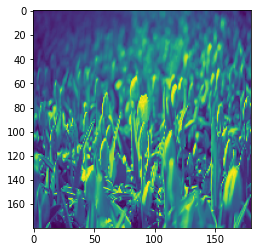

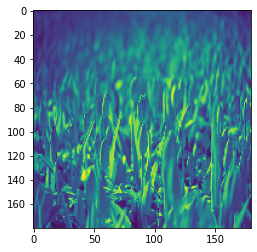

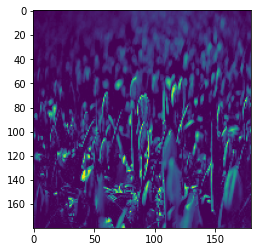

In [ ]:
# 컬러채널별로 살펴보기, 각각의 채널은 0~255로 구성, matplotlib에서 컬러채널이 없는 경우는 기본 값으로 색상컬러가 지정됨
plt.figure()
plt.imshow(numpy_images[1,:,:,0]) #
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,1])
plt.show()

plt.figure()
plt.imshow(numpy_images[1,:,:,2])
plt.show()

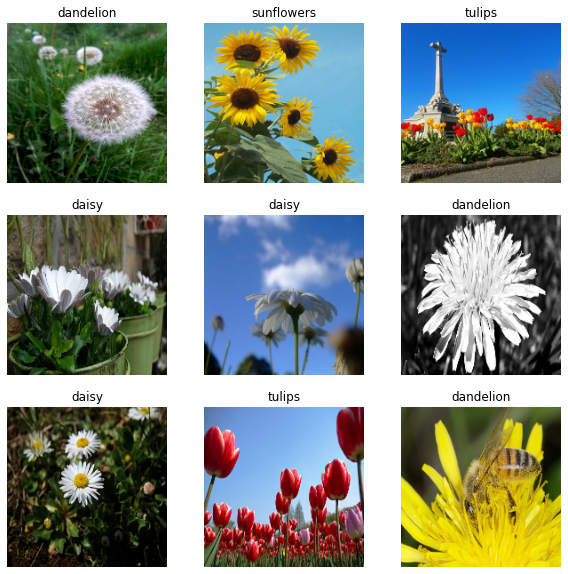

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('int'))  # 타입을 int로 변환하여 출력
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

In [ ]:
num_classes = 5

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),  # 표준화 하는 함수도 제공됨
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,  # train dataset을 널어주면 배치단위로 데이터가 넘어가면서 학습
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 10s 96ms/step - loss: 1.3125 - accuracy: 0.4275 - val_loss: 1.0877 - val_accuracy: 0.5695
Epoch 2/10
92/92 [==============================] - 11s 109ms/step - loss: 1.0799 - accuracy: 0.5691 - val_loss: 1.0234 - val_accuracy: 0.5872
Epoch 3/10
92/92 [==============================] - 10s 103ms/step - loss: 0.9128 - accuracy: 0.6318 - val_loss: 0.9649 - val_accuracy: 0.6131
Epoch 4/10
92/92 [==============================] - 8s 86ms/step - loss: 0.7619 - accuracy: 0.7159 - val_loss: 0.9994 - val_accuracy: 0.5981
Epoch 5/10
92/92 [==============================] - 9s 89ms/step - loss: 0.5773 - accuracy: 0.7841 - val_loss: 1.0311 - val_accuracy: 0.6144
Epoch 6/10
92/92 [==============================] - 8s 87ms/step - loss: 0.3907 - accuracy: 0.8597 - val_loss: 1.1051 - val_accuracy: 0.6362
Epoch 7/10
92/92 [==============================] - 8s 86ms/step - loss: 0.2719 - accuracy: 0.9053 - val_loss: 1.2641 - val_accuracy: 0.6403
Epoch 8/

In [ ]:
model.predict(val_ds)

array([[-17.307405  , -12.31845   ,  21.085493  , -12.186613  ,
         27.33023   ],
       [  1.519654  ,  -0.5308649 ,  -0.43964803,   0.46859372,
          2.2635663 ],
       [ -6.0999846 ,   5.3919964 ,  -1.0522579 ,   2.2216215 ,
         -3.3805306 ],
       ...,
       [ -3.0489347 ,   1.5803881 ,   0.66472584,  -4.6630926 ,
          8.583327  ],
       [ -8.661428  ,   4.207963  ,  -6.610398  ,  11.212848  ,
         -1.7304215 ],
       [  0.6502604 ,  -4.5996475 ,  14.061653  ,  -9.011803  ,
          3.4166062 ]], dtype=float32)

Numpy로 가지고 있는 경우

입력 형태를 맞춰서 넣어주면 됨

In [ ]:
img = numpy_images[:10,:,:,:]
pred_y=model.predict(img)

In [ ]:
pred_y.shape

(10, 5)

In [ ]:
pred_y

array([[ -7.3200116 ,   7.4014487 ,  -4.223001  ,   2.7727726 ,
          0.50054294],
       [ -1.0247399 ,  -1.5748622 ,  -1.0692645 ,  -1.5351778 ,
          8.37106   ],
       [ -8.499215  ,  -5.305647  ,   7.03845   ,  -3.3259726 ,
         17.286304  ],
       [ -6.523391  ,  -7.964234  ,   5.901314  ,  -1.4986935 ,
         13.808231  ],
       [  1.3664553 ,   0.6325836 ,   1.5321069 ,  -3.7232907 ,
         -0.48012185],
       [ -1.6642417 ,  10.060853  ,  -1.4068838 ,  -1.5380933 ,
         -2.6723986 ],
       [  6.1414294 ,  -1.2766855 ,   0.81006306,  -9.745757  ,
         10.661632  ],
       [  0.8599516 ,  -5.502439  ,   5.893642  ,  -1.680302  ,
         15.430172  ],
       [ -4.8828645 ,  -9.017408  ,  17.315126  ,  -4.6703234 ,
          1.2576169 ],
       [  4.15198   ,  24.814169  , -10.484233  , -24.63129   ,
          0.63930845]], dtype=float32)

In [ ]:
pred_labels = pred_y.argmax(axis=1)

In [ ]:
pred_labels

array([1, 4, 4, 4, 2, 1, 4, 4, 2, 1])

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


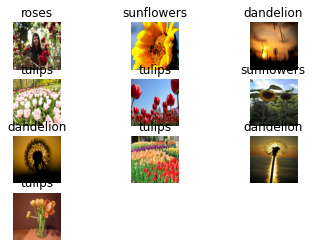

In [ ]:
for i in range(10):
  ax = plt.subplot(4, 3, i + 1)
  plt.imshow(numpy_images[i].astype("int"))
  plt.title(class_names[pred_labels[i]])
  plt.axis("off")